In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import seaborn as sb
import numpy as np

In [49]:
file_path= r"C:\Users\subha\Desktop\AgriSage\Crop_Recommendation.csv"
raw_data= pd.read_csv (file_path)

In [50]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [51]:
target = 'Crop'

In [52]:
a1 = raw_data.copy()

In [53]:
features = a1.columns[:-1]
features

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')

The Interquartile Range (IQR) method is a common statistical technique used to identify and handle outliers in a dataset. The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the dataset.

In [54]:
Q1= a1[features].quantile(0.25)
Q3 = a1[features].quantile(0.75)
IQR = Q3 - Q1 


print('25th percentile of the given data is \n', Q1)
print('75th percentile of the given data is \n', Q3)
print('Interquartile range is\n', IQR)

25th percentile of the given data is 
 Nitrogen       21.000000
Phosphorus     28.000000
Potassium      20.000000
Temperature    22.769375
Humidity       60.261953
pH_Value        5.971693
Rainfall       64.551686
Name: 0.25, dtype: float64
75th percentile of the given data is 
 Nitrogen        84.250000
Phosphorus      68.000000
Potassium       49.000000
Temperature     28.561654
Humidity        89.948771
pH_Value         6.923643
Rainfall       124.267508
Name: 0.75, dtype: float64
Interquartile range is
 Nitrogen       63.250000
Phosphorus     40.000000
Potassium      29.000000
Temperature     5.792279
Humidity       29.686818
pH_Value        0.951950
Rainfall       59.715822
dtype: float64


In [55]:
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bound of the given data is \n', lower_bound)
print('upper bound of the given data is \n', upper_bound)


lower bound of the given data is 
 Nitrogen      -73.875000
Phosphorus    -32.000000
Potassium     -23.500000
Temperature    14.080956
Humidity       15.731726
pH_Value        4.543768
Rainfall      -25.022047
dtype: float64
upper bound of the given data is 
 Nitrogen       179.125000
Phosphorus     128.000000
Potassium       92.500000
Temperature     37.250073
Humidity       134.478998
pH_Value         8.351567
Rainfall       213.841241
dtype: float64


In [56]:
outliers = (a1[features] < lower_bound) | (a1[features] > upper_bound)

a1_no_outliers = a1[~outliers.any(axis=1)]

a1_no_outliers.reset_index(inplace=True, drop=True)

# Display the cleaned data
a1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1768 non-null   int64  
 1   Phosphorus   1768 non-null   int64  
 2   Potassium    1768 non-null   int64  
 3   Temperature  1768 non-null   float64
 4   Humidity     1768 non-null   float64
 5   pH_Value     1768 non-null   float64
 6   Rainfall     1768 non-null   float64
 7   Crop         1768 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 110.6+ KB


In [57]:
a1_no_outliers[target].value_counts()

Crop
Banana         100
Lentil         100
Jute           100
Cotton         100
Muskmelon      100
Watermelon     100
Maize          100
Pomegranate    100
Coffee         100
Blackgram      100
MungBean       100
PigeonPeas     100
KidneyBeans    100
Mango           98
Coconut         85
Orange          83
MothBeans       58
ChickPea        58
Papaya          54
Rice            32
Name: count, dtype: int64

In [58]:
def dist_plot(data, feature_list):
    n_cols= 2 
    n_rows = int(np.ceil(len(feature_list)/n_cols)) 
    # Creating figure
    fig = plt.figure(figsize=(16, 4*n_rows))
    outer = GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))
        ax_box= plt.Subplot(fig, inner[0])
        sb.boxplot(data=data, x=feature_list[i], color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculating skewness and kurtosis
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()
        if skewness < 0:
            x=0.25
        else:
            x=0.95
        # Adding skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                         transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                    fontsize=10)
        fig.add_subplot(ax_hist)
    plt.tight_layout()
    plt.show(block=False)

C:\Users\subha\AppData\Local\Temp\ipykernel_3364\2722901249.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


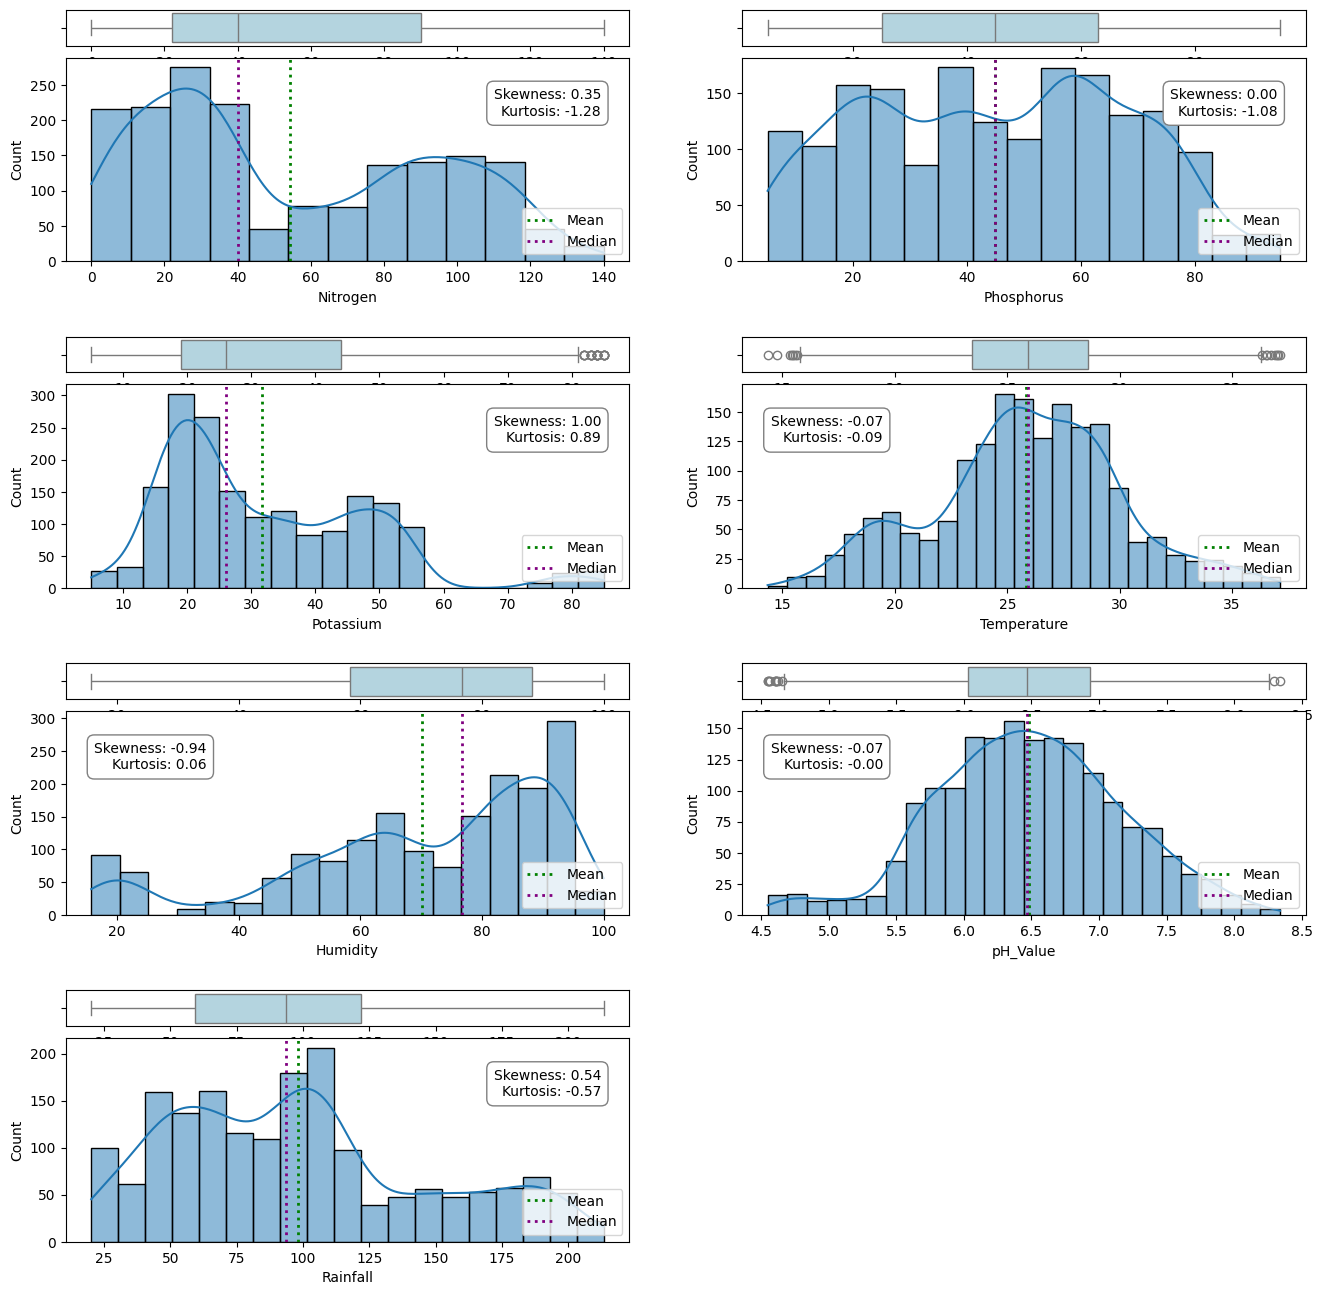

In [59]:
dist_plot(a1_no_outliers, features)


In [60]:
def plot_counts(data, features, hue=None):
    n_cols = 2 
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        #bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
        sb.countplot(
        data = data,
        x = feature,
        palette = 'Paired',
        hue = hue,
        ax = axes[i]
        )
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

    axes[i].annotate(
        '{:.0f}'.format(label),
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
    axes[i].set(ylabel='Count', title=feature, xlabel='')
    axes[i].tick_params(axis='x', rotation=30)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\subha\AppData\Local\Temp\ipykernel_3364\1976827825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(


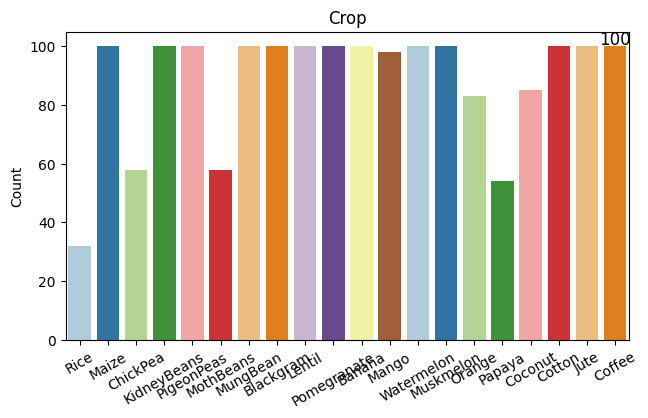

In [61]:
plot_counts(a1_no_outliers, [target])

In [62]:
print (a1.head())

   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  


In [63]:
columns_to_transform = ['Potassium']
# Replace zeros with a small number (e.g., 1e-6) or filter them out
a1[columns_to_transform] = a1[columns_to_transform].replace(0, np.nan)
a1[columns_to_transform] = a1[columns_to_transform].apply(np.log)
# Display the first few rows of the transformed dataset
print("Transformed Data:")
print(a1.head())

Transformed Data:
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42   3.761200    20.879744  82.002744  6.502985   
1        85          58   3.713572    21.770462  80.319644  7.038096   
2        60          55   3.784190    23.004459  82.320763  7.840207   
3        74          35   3.688879    26.491096  80.158363  6.980401   
4        78          42   3.737670    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
